# DECISION TREE
Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.
Tasks:
1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).
2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.
3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.
4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.
6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features
Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?




In [1]:
#importing the necessary library 
import pandas as pd
import numpy as np


In [2]:
#loading the dataset

df=pd.read_excel("heart_disease.xlsx",sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


# 1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [3]:
# checking what is present in the dataset 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


# 2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.


In [4]:
#checking the shape of the data

df.shape

(908, 13)

In [5]:
#checking the information of dataset with datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
#checking for the null values

df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
#the oldpeak is having outlayers so checking the decribtion of data

df['oldpeak'].describe()

count    846.000000
mean       0.891253
std        1.093875
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [8]:
#checking the value count associated with each column vlaues 

df['oldpeak'].value_counts()

 0.0    358
 1.0     83
 2.0     76
 1.5     48
 3.0     28
 0.5     19
 1.2     17
 2.5     16
 1.4     15
 0.8     15
 0.6     14
 1.6     14
 0.2     14
 1.8     12
 0.4     10
 0.1      9
 4.0      8
 2.8      7
 2.6      7
 0.7      5
 1.9      5
 1.3      5
 2.2      5
 0.3      5
 2.4      4
 0.9      4
 1.1      4
 3.6      4
 3.4      3
-1.0      2
 3.2      2
 2.3      2
-0.5      2
 4.2      2
 2.1      2
 3.5      2
 1.7      2
-2.0      1
 4.4      1
 3.7      1
 2.9      1
 5.6      1
 6.2      1
-0.7      1
 3.1      1
-0.1      1
 5.0      1
-1.1      1
-0.8      1
-2.6      1
-0.9      1
-1.5      1
 3.8      1
Name: oldpeak, dtype: int64

In [9]:
#from the description we can see there is a relation between restecg and oldpeak

df.groupby('restecg')['oldpeak'].mean()

restecg
lv hypertrophy      1.087222
normal              0.792500
st-t abnormality    1.001370
Name: oldpeak, dtype: float64

In [10]:
#checking for the best imputation technique

df.groupby('restecg')['oldpeak'].agg(['count', 'mean', 'median', 'std'])

,count,mean,median,std
restecg,,,,
lv hypertrophy,180,1.087222,0.8,1.189340
normal,520,0.792500,0.2,1.005573
st-t abnormality,146,1.001370,0.9,1.229914


In [11]:
#data imputation with the values of restecg and oldpeak by groupinhg them and finf the mean and replacing 

df['oldpeak'] = df.groupby('restecg')['oldpeak'].transform(lambda x: x.fillna(x.mean()))


In [12]:
#checking for the null values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [13]:
#checking the correlation between the data 
df.corr()

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.234136,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.153046,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.029225,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.026372,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.131137,-0.323058
oldpeak,0.234136,0.153046,0.029225,0.026372,-0.131137,1.000000,0.417476
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.417476,1.000000


In [14]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.894373,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.056283,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.792500,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


<AxesSubplot:>

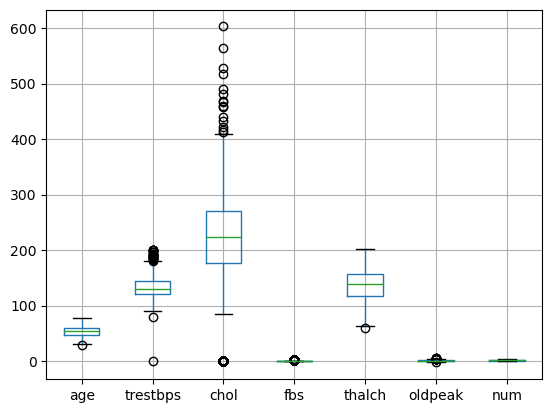

In [15]:
df.boxplot()

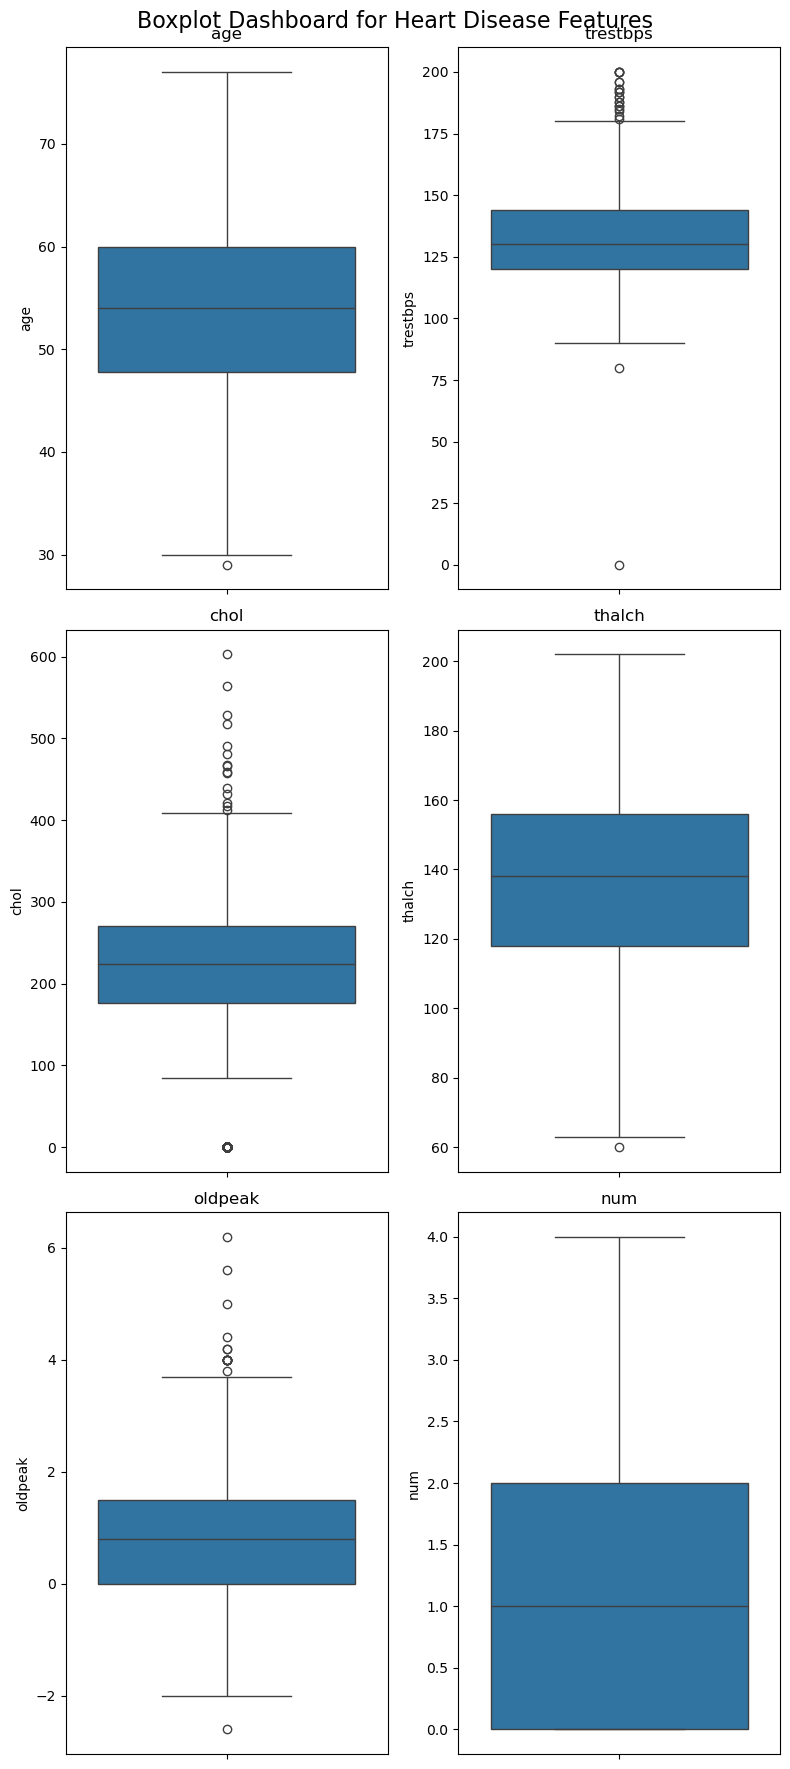

In [16]:
#creating a dashboard for boxplot for detectimg the outlayers
import matplotlib.pyplot as plt
import seaborn as sns

# List of features for boxplots
features = ['age', 'trestbps', 'chol',  'thalch', 'oldpeak', 'num']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 18))
fig.suptitle("Boxplot Dashboard for Heart Disease Features", fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature in a subplot
for i, feature in enumerate(features):
    sns.boxplot(data=df[feature], ax=axes[i])
    axes[i].set_title(feature)

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
#i am not detecting/treating the outlayers because the decision tree with reduce
#influence of oulayers and standardization will also reduce the influence of 
#outlayers so i am not treating them

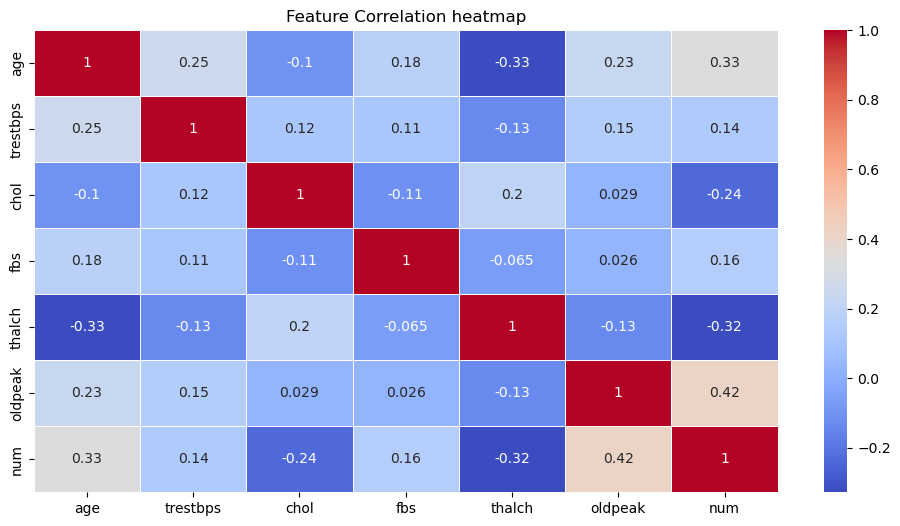

In [18]:
#correlation matrix
corrmat=df.corr()

plt.figure(figsize=(12,6))

sns.heatmap(corrmat,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title("Feature Correlation heatmap")
plt.show()

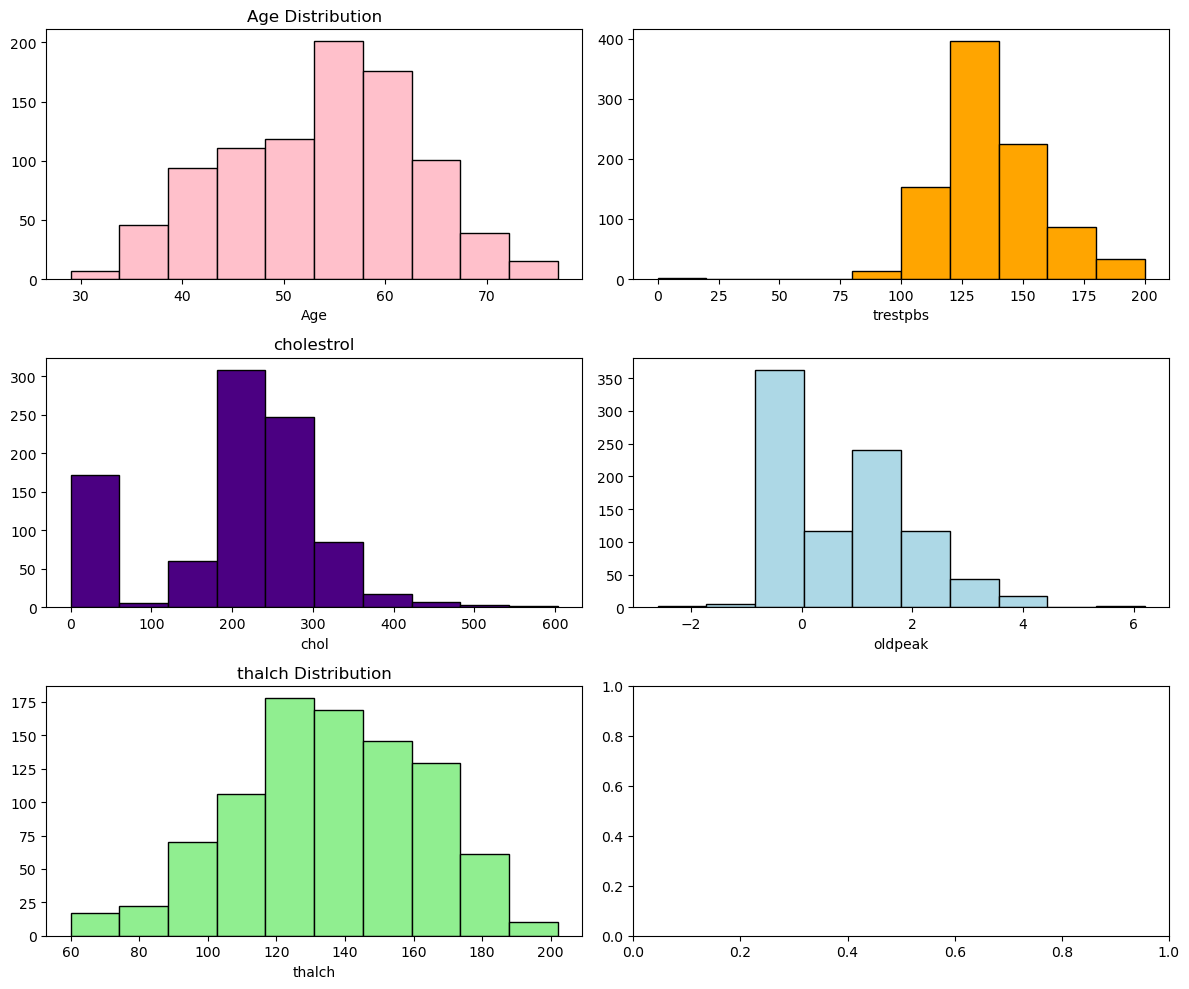

skewness of age data  -0.13679653817221868
skewness of trestbps data  0.3536499733817675
skewness of chol data  -0.564765692042219
skewness of oldpeak data  1.0481749602888868
skewness of thalch data  -0.21955477484333802


In [19]:
 import warnings
warnings.filterwarnings('ignore')   #ignoring alll the warnings

# Creating the dashboard layout
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 2x2 grid layout

# Histogram for Age
axes[0, 0].hist(df['age'],  color='pink', edgecolor='black')
axes[0, 0].set_title("Age Distribution")
axes[0, 0].set_xlabel("Age")

# Histogram for trestbps
axes[0, 1].hist(df['trestbps'],  color='orange', edgecolor='black')
axes[0, 1].set_xlabel("trestpbs")

# Histogram for chol
axes[1, 0].hist(df['chol'], color='indigo', edgecolor='black')
axes[1, 0].set_title("cholestrol")
axes[1, 0].set_xlabel("chol")

# Histogram for trestbps
axes[1, 1].hist(df['oldpeak'],color='lightblue', edgecolor='black')
axes[1, 1].set_xlabel("oldpeak")


axes[2, 0].hist(df['thalch'], color='lightgreen', edgecolor='black')
axes[2, 0].set_title("thalch Distribution")
axes[2, 0].set_xlabel("thalch")



# Adjust layout
plt.tight_layout()
plt.show()


print("skewness of age data ",df['age'].skew())
print("skewness of trestbps data ",df['trestbps'].skew())
print("skewness of chol data ",df['chol'].skew())
print("skewness of oldpeak data ",df['oldpeak'].skew())
print("skewness of thalch data ",df['thalch'].skew())

# 3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [21]:
#data transformation or feature engineering
#label encoding

from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()

df['sex'] = label.fit_transform(df['sex'])
df['cp'] = label.fit_transform(df['cp'])
df['restecg'] = label.fit_transform(df['restecg'])
df['slope'] = label.fit_transform(df['slope'])
df['thal'] = label.fit_transform(df['thal'])


In [22]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,False,2.30000,0,0,0
1,41,1,1,135,203,False,1,132,False,0.00000,1,0,0
2,57,1,0,140,192,False,1,148,False,0.40000,1,0,0
3,52,1,3,118,186,False,0,190,False,0.00000,1,0,0
4,57,1,0,110,201,False,1,126,True,1.50000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,120,False,1.50000,2,2,4
904,62,1,0,166,170,False,2,120,True,3.00000,1,2,4
905,56,1,2,170,0,False,0,123,True,2.50000,0,1,4
906,56,1,2,144,208,True,2,105,TURE,1.00137,0,0,4


In [23]:
df['exang'] = df['exang'].astype(str)
df['exang'] = label.fit_transform(df['exang'])

In [24]:
df_cat=df[['sex','cp','restecg','slope','thal','exang']]
df_cat

,sex,cp,restecg,slope,thal,exang
0,1,3,0,0,0,1
1,1,1,1,1,0,1
2,1,0,1,1,0,1
3,1,3,0,1,0,1
4,1,0,1,1,0,3
...,...,...,...,...,...,...
903,1,0,1,2,2,1
904,1,0,2,1,2,3
905,1,2,0,0,1,3
906,1,2,2,0,0,2


In [25]:
from sklearn.preprocessing import StandardScaler

df_cont=df[['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak']]

scale=StandardScaler()

df_cont=scale.fit_transform(df_cont)

df_cont=pd.DataFrame(df_cont,columns=['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak'])


In [26]:
df_new=pd.concat([df_cat,df_cont,df['num']],axis=1)
df_new

,sex,cp,restecg,slope,thal,exang,age,trestbps,chol,fbs,thalch,oldpeak,num
0,1,3,0,0,0,1,1.006027,0.567394,0.281297,1.976894,0.524183,1.331463,0
1,1,1,1,1,0,1,-1.397560,0.076967,0.013526,-0.505844,-0.147705,-0.847184,0
2,1,0,1,1,0,1,0.350503,0.322181,-0.084656,-0.505844,0.449529,-0.468289,0
3,1,3,0,1,0,1,-0.195767,-0.756760,-0.138211,-0.505844,2.017268,-0.847184,0
4,1,0,1,1,0,3,0.350503,-1.149102,-0.004325,-0.505844,-0.371668,0.573673,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1,0,1,2,2,1,-0.086513,-0.413461,-1.798388,-0.505844,-0.595631,0.573673,4
904,1,0,2,1,2,3,0.896773,1.597292,-0.281021,-0.505844,-0.595631,1.994530,4
905,1,2,0,0,1,3,0.241249,1.793463,-1.798388,-0.505844,-0.483649,1.520911,4
906,1,2,2,0,0,2,0.241249,0.518352,0.058155,1.976894,-1.155538,0.101351,4


In [27]:
df_new['num'].value_counts()

0    399
1    265
2    109
3    107
4     28
Name: num, dtype: int64

# 4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [28]:
#spliting the data into train and split

from sklearn.model_selection import train_test_split

x=df_new.drop(df_new[['num']],axis=1)  #independent variable 
y=df_new['num']                        #dependent variable

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=37)


In [29]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((726, 12), (182, 12), (726,), (182,))

In [30]:
#fitting the decision tree model

from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='gini',max_depth=5)

model.fit(xtrain,ytrain)

y_pred_train=model.predict(xtrain)
y_pred_test=model.predict(xtest)



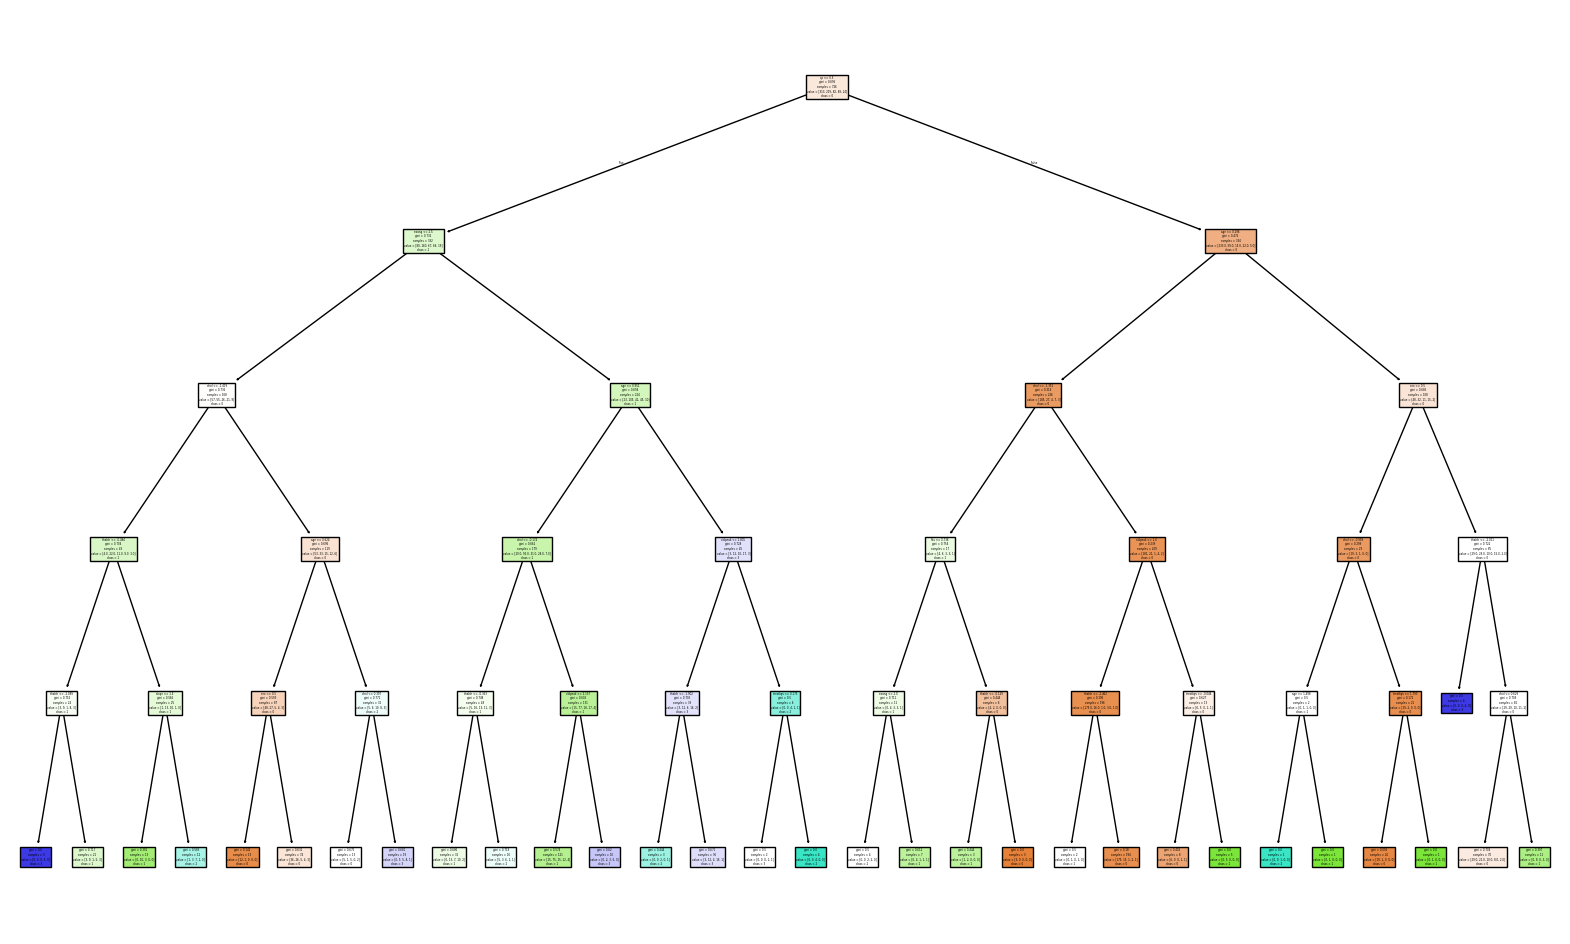

In [31]:
#visualizing the tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
plot_tree(model,filled=True,feature_names=x.columns,class_names=['0','1','2','3','4'])
plt.show()

In [32]:
nodes=model.tree_.node_count
depth=model.tree_.max_depth

print(f"Number of nodes:{nodes}")
print(f"Depth of the tree:{depth}")


Number of nodes:61
Depth of the tree:5


In [33]:
# Calculating the performance of the tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(ytrain, y_pred_train)
accuracy_test = accuracy_score(ytest, y_pred_test)

precision = precision_score(ytrain, y_pred_train, average='macro')  # Adjust 'macro' if needed
precision_test = precision_score(ytest, y_pred_test, average='macro') #for binary classification
                                                                    #calculate scores across different classes
recall = recall_score(ytrain, y_pred_train, average='macro')        #calculates independent for each class and 
recall_test = recall_score(ytest, y_pred_test, average='macro')     #then average teh score

f1score = f1_score(ytrain, y_pred_train, average='macro')
f1score_test = f1_score(ytest, y_pred_test, average='macro')

print("Accuracy score train:", accuracy)
print("Accuracy score test :", accuracy_test)
print()
print("Precision score train:", precision)
print("Precision score test :", precision_test)
print()
print("Recall score train   :", recall)
print("Recall score test    :", recall_test)
print()
print("F1 score train       :", f1score)
print("F1 score test        :", f1score_test)

Accuracy score train: 0.6515151515151515
Accuracy score test : 0.5384615384615384

Precision score train: 0.4731978066849443
Precision score test : 0.32530588907947394

Recall score train   : 0.4376662910524402
Recall score test    : 0.3203854485106148

F1 score train       : 0.442854745238095
F1 score test        : 0.3169508393037805


In [34]:
#cross validation check using shuffle split 

from sklearn.model_selection import cross_val_score

score=cross_val_score(model,x,y,cv=10,scoring='accuracy')
scoretrain=cross_val_score(model,xtrain,ytrain,cv=10,scoring='accuracy')
scoretest=cross_val_score(model,xtest,ytest,cv=10,scoring='accuracy')


print("cross validation score      :",score.mean())
print()

print("cross validation score train:",scoretrain.mean())
print()

print("cross validation score test :",scoretest.mean())

cross validation score      : 0.510976800976801

cross validation score train: 0.5372526636225267

cross validation score test : 0.5722222222222222


In [35]:

y_pred_proba=model.predict_proba(xtest)
y_pred_proba.ravel()
y_pred_proba

array([[0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.90206186, 0.07731959, 0.00515464, 0.01030928, 0.00515464],
       [0.12396694, 0.61983471, 0.12396694, 0.09917355, 0.03305785],
       [0.        , 0.26315789, 0.26315789, 0.42105263, 0.05263158],
       [0.08333333, 0.33333333, 0.11111111, 0.44444444, 0.02777778],
       [0.90206186, 0.07731959, 0.00515464, 0.01030928, 0.00515464],
       [0.90206186, 0.07731959, 0.00515464, 0.01030928, 0.00515464],
       [0.90206186, 0.07731959, 0.00515464, 0.01030928, 0.00515464],
       [0.90206186, 0.07731959, 0.00515464, 0.01030928, 0.00515464],
       [0.        , 0.26315789, 0.26315789, 0.42105263, 0.05263158],
       [0.        , 0.        , 0.        , 0.5       , 0.5       ],
       [0.3125    , 0.1875    , 0.375     , 0.0625    , 0.0625    ],
       [0.12396694, 0.61983471, 0.12396694, 0.09917355, 0.03305785],
       [0.48648649, 0.35135135, 0.06756757, 0.05405405, 0.04054054],
       [0.        , 0.76923077, 0.

In [36]:
y.value_counts()

0    399
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [37]:
y_pred_proba=model.predict_proba(xtrain)
y_pred_proba.shape
#ytrain.shape


#==>for this data we can't draw a roc_curve becauses there are multiple values in target columns other than "binary data",the
#Roc curve can be only drawn for "binary data in target variable" here we are having or "5 classes" in target variable so it is
#not possible to draw a roc curve


(726, 5)

In [38]:
#checking the roc cure with auc score                                        if we have the target data with binary data
                                                                            #these will be the code for creating the roc_curve
#from sklearn.metrics import roc_curve,roc_auc_score


#fpr,tpr,dummy=roc_curve(ytrain,y_pred_proba)

#plt.scatter(x=fpr,y=tpr)
#plt.plot(fpr,tpr,color='red')
#plt.ylabel("True positive Rate")
#plt.xlabel("False positive Rate")
#plt.show()

#auc=roc_auc_score(ytrain,y_pred_proba)
#print("Area under curve:", (auc*100).round(3))

Shape of y_test_bin: (726, 5)
Shape of y_pred_proba: (726, 5)


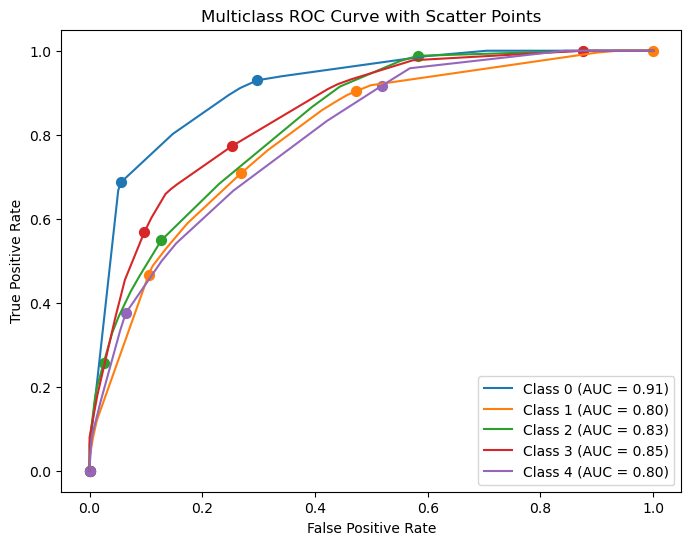

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Ensure consistent class labels
unique_classes = np.unique(ytrain)  # Get actual unique class labels
y_test_bin = label_binarize(ytrain, classes=unique_classes)  # Correct label binarization

# Validate dimensions
print("Shape of y_test_bin:", y_test_bin.shape)
print("Shape of y_pred_proba:", y_pred_proba.shape)

# Compute ROC curve & AUC for each class
plt.figure(figsize=(8, 6))
for i in range(len(unique_classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {unique_classes[i]} (AUC = {auc_score:.2f})")
    plt.scatter(fpr[::5], tpr[::5], marker='o', s=50)  # Scatter plot for better visualization

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve with Scatter Points")
plt.legend()
plt.show()

# 5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [40]:
#search for best hyper parameters using grid search cv

from sklearn.model_selection import GridSearchCV

#choosing the different hyperparameters

param_grid={'criterion':['entropy',"gini"],
           "max_depth":[3,5,7,9,4,6,8,10]}

#apply the gridsearch cv

grid=GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
grid.fit(xtrain,ytrain)

#getting the best estimators
bestmodel=grid.best_estimator_

#making the prediction

y_pred_train=grid.predict(xtrain)

y_pred_test=grid.predict(xtest)

#calculating the metrics
training_accuracy=accuracy_score(ytrain,y_pred_train)
testing_accuracy=accuracy_score(ytest,y_pred_test)

print("best parameters",grid.best_params_)
print("best estimators",bestmodel)
print("accuracy score train",training_accuracy)
print("accuracy score test",testing_accuracy)

best parameters {'criterion': 'gini', 'max_depth': 4}
best estimators DecisionTreeClassifier(max_depth=4)
accuracy score train 0.5991735537190083
accuracy score test 0.5604395604395604


In [41]:
from sklearn.model_selection import GridSearchCV

param_grid={'criterion':['entropy',"gini"],
           "max_depth":[7,9,4,6,8,10],
           "min_samples_split":[2,5,10,15],
           "min_samples_leaf":[1,2,3,4,5,10],
           "splitter":["best","random"]}

grid=GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
grid.fit(xtrain,ytrain)

#getting the best estimators
bestmodel=grid.best_estimator_

#making the prediction

y_pred_train=grid.predict(xtrain)

y_pred_test=grid.predict(xtest)

#calculating the metrics
training_accuracy=accuracy_score(ytrain,y_pred_train)
testing_accuracy=accuracy_score(ytest,y_pred_test)

print("best parameters",grid.best_params_)
print()
print("best estimators",bestmodel)
print()
print("accuracy score train",training_accuracy)
print("accuracy score test",testing_accuracy)

best parameters {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}

best estimators DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=10)

accuracy score train 0.6790633608815427
accuracy score test 0.5384615384615384


In [ ]:
#==>from the above results we can conclude that the decision tree with criterion="Gini" and max_depth=5 and splitter="best" and 
#=>min_samples_leaf=4 and min_samples_split=10 is considered to be the best parameters for these problem

# 6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

Visualize the decision tree structure to understand the rules learned by the model and identify important features

In [42]:
#claculating the metrics like accuracy score,precsion,recall f1 score,support,confusion matrix

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(ytest,y_pred_test))
print()

cm=confusion_matrix(ytest,y_pred_test)
print("confusion matrix :\n", cm)
print()

print("accuracy_score of training:",accuracy_score(ytrain,y_pred_train))
print("accuracy_score of testing :",accuracy_score(ytest,y_pred_test))


              precision    recall  f1-score   support

           0       0.69      0.79      0.74        86
           1       0.36      0.46      0.40        46
           2       0.31      0.19      0.23        27
           3       0.40      0.21      0.28        19
           4       0.00      0.00      0.00         4

    accuracy                           0.54       182
   macro avg       0.35      0.33      0.33       182
weighted avg       0.51      0.54      0.51       182


confusion matrix :
 [[68 15  3  0  0]
 [18 21  5  2  0]
 [ 6 13  5  3  0]
 [ 5  8  2  4  0]
 [ 1  1  1  1  0]]

accuracy_score of training: 0.6790633608815427
accuracy_score of testing : 0.5384615384615384


In [43]:
#==>From the above results we can conclude that model is not performing best

#==>the precision,recall,f1 score are 0 for 2 and 4 so the model is struggling to correctly classify them

#==>from confusion metrix  2,3,4 are missclassified into other category

#==>we can say the model is underfitting because it is not performing best on training and testing



In [44]:
# Get feature importances
feature_importance = model.feature_importances_
features = x.columns

# Create DataFrame to visualize
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print(importance_df)

     Feature  Importance
1         cp    0.345650
8       chol    0.157360
6        age    0.151852
10    thalch    0.102751
5      exang    0.055862
11   oldpeak    0.054992
0        sex    0.051802
7   trestbps    0.050904
3      slope    0.015022
9        fbs    0.013806
2    restecg    0.000000
4       thal    0.000000


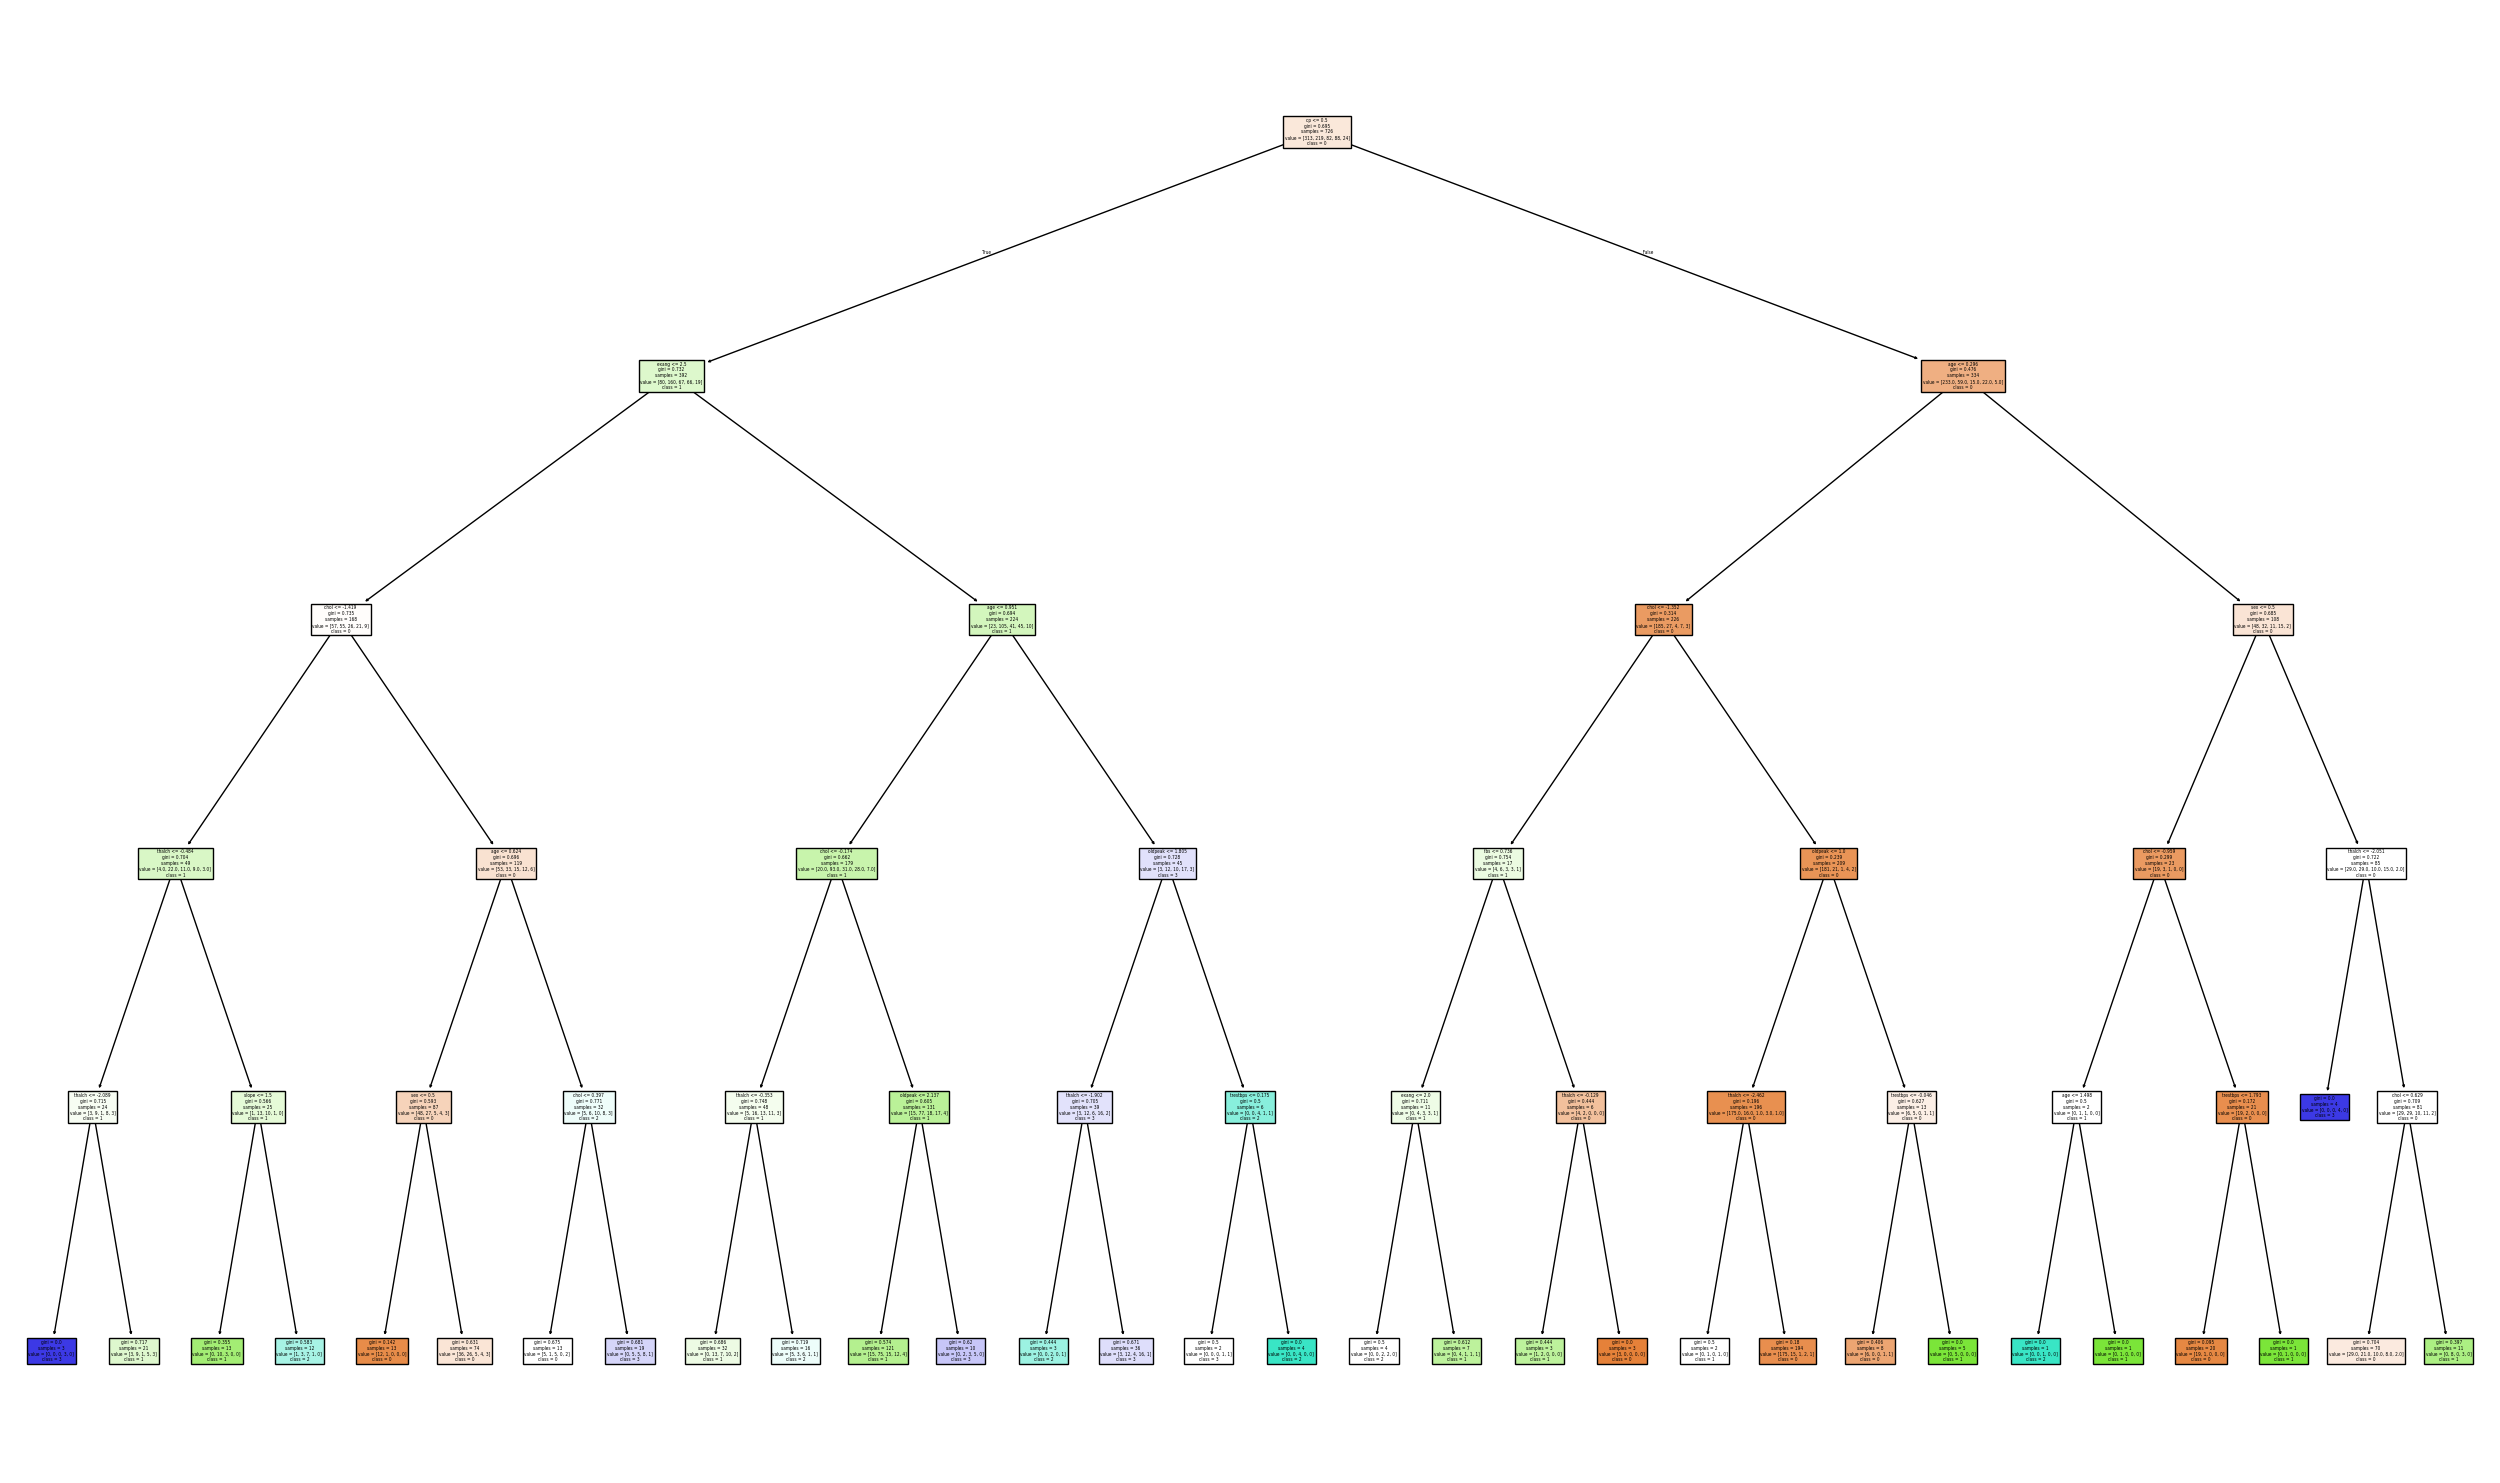

In [45]:
#visualizing the decision tree 

# Get unique class names
class_labels = list(map(str, np.unique(ytrain)))

# Plot the decision tree
plt.figure(figsize=(32,19))
plot_tree(model, feature_names=xtrain.columns, class_names=class_labels, filled=True)
plt.show()

# Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

2. What is the difference between the Label encoding and One-hot encoding?



In [46]:
#1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?



#1-Ans:-The common hyperparameters in decision tree model are "criterion"(gini,entropy),"max_depth"(depth of the tree),
         #"max_features"(number of features to consider when finding the best_split),"min_samples_leaf"(min number 
         # required at leaf node),"min_smaples_splits"(minumum number of samples required to split an internal node),
         #"splitter"(controls how the tree choose the split point),"max_leaf_nodes"(limits max no of leaf nodes in tree)
        #"cop_alpha"(cost complexity pruning to simpilify the tree by removing less impactful splits)
        
#1->max_depth:=-
#     Too deep → May lead to overfitting (capturing noise in data).
#     Too shallow → May underfit (not capturing patterns properly).


#2. min_samples_split

#      Higher values → More conservative splits, leading to simpler trees (less risk of overfitting).
#      Lower values → Allows more splits, leading to complex trees (higher risk of overfitting).

#3. min_samples_leaf
#      Higher values → Ensures larger leaf nodes, reducing overfitting.
#      Lower values → Allows smaller leaf nodes, increasing complexity.

#4. max_features
#     Smaller values → Leads to more randomness, improving generalization.
#     Larger values → Can make the model more deterministic, sometimes improving accuracy but increasing overfitting risk.


#5. criterion

#    "gini" → Uses Gini impurity (favored for faster computation).
#    "entropy" → Uses Information Gain (sometimes leads to better splits).


#6. splitter
#    "best" → Chooses the optimal split based on the criterion.
#     "random" → Selects a random split, sometimes useful for avoiding overfitting.


#7. max_leaf_nodes
#    Lower values → Forces a smaller tree, preventing complexity.
#     Higher values → Allows more branching, increasing the risk of overfitting.


#8. ccp_alpha (Cost Complexity Pruning)

#     Higher values → Prunes more aggressively, reducing overfitting.
#     Lower values → Allows a complex tree, which may overfit.


In [47]:
#2. What is the difference between the Label encoding and One-hot encoding?


#Ans:-label encoding changes the categorical values into labels assigning the values from "0" to number of unique values
      
#    Ex-data=female,male,trans,others==>label encode as==>0,1,2,3  in alphabetics order

#2) One-Hot-Encoding:encodes the categorical data into 0 and 1 (0,1) makeing the uniques values of categorical  values seperates 
# in each column as 0 mean not present and 1 means present

#   Ex-male,female,trans,others==>onehotencoded as >4 columns with (0,1) values 